# Imports

In [1]:
# executes in ~23 seconds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import bespoke module p04.py

In [2]:
# first test: executed in 46 seconds
# executes much faster if you first import pd and np
# executes in ~11 seconds
from p04 import vectorize_tfidf
from p04 import reduce_dim_lsa
from p04 import reduce_dim_lda
from p04 import reduce_dim_nmf
from p04 import display_topics

In [3]:
import pickle

In [4]:
with open('grouped_sorted.pickle', 'rb') as readfile:
    subjects = pickle.load(readfile)

In [5]:
subjects

,text,le
label,,
Linear Algebra,152,152
Probability,124,124
CS,104,104
Diff. Eq.,93,93
Algorithms,81,81
Statistics,79,79
Calculus,70,70
Data Structures,62,62
AI,48,48


In [6]:
with open('df.pickle', 'rb') as readfile:
    df = pickle.load(readfile)

In [7]:
df

,text,label,le
0,follow content provide creative common license...,Calculus,3
1,sequence segment review mathematical backgroun...,Probability,9
2,follow content provide creative common license...,CS,2
3,follow content provide creative common license...,Algorithms,1
4,follow content provide creative common license...,Algorithms,1
...,...,...,...
855,follow content provide creative common license...,Math for Eng.,7
856,music david j malan end week see cir...,Diff. Eq.,5
857,follow content provide opencourseware creati...,Linear Algebra,6
858,follow content provide creative common license...,AI,0


In [8]:
df_linalg = df[df['label']=='Linear Algebra']
df_prob = df[df['label']=='Probability']
df_cs = df[df['label']=='CS']
df_diffeq = df[df['label']=='Diff. Eq.']
df_algo = df[df['label']=='Algorithms']
df_stats = df[df['label']=='Statistics']
df_calc = df[df['label']=='Calculus']
df_datastruc = df[df['label']=='Data Structures']
df_ai = df[df['label']=='AI']
df_engmath = df[df['label']=='Math for Eng.']
df_nlp = df[df['label']=='NLP']

# Heatmaps Iteration 03: TRY NMF

TL;DR It works very well for interpretability!

In [109]:
df_s = df.copy()
sm_v, feature_names = vectorize_tfidf(df_s, max_df=0.6)

In [157]:
rd_v, model_components = reduce_dim_lsa(sm_v, 15)

In [209]:
display_topics(model_components, feature_names, 30)


Topic  0
lambda, eigenvalue, matrix, eigenvector, transpose, inverse, zero, diagonal, symmetric, orthogonal, power, projection, negative, singular, identity, sine, determinant, equation, complex, multigrid, positive, exponential, root, system, squared, jacobi, pi, multiply, step, orthonormal

Topic  1
probability, event, outcome, conditional, toss, occur, coin, sample, axiom, head, intersection, independence, union, complement, element, independent, model, disjoint, subset, space, roll, experent, likely, calculate, additivity, sequence, scenario, definition, belief, card

Topic  2
list, log, element, string, hash, code, algorithm, loop, array, sort, search, size, program, item, return, run, python, line, character, type, merge, object, constant, key, block, memory, operation, file, step, input

Topic  3
integral, theta, delta, curve, dx, area, formula, field, pi, region, integrate, surface, plane, dy, zero, cosine, partial, theorem, curl, line, sine, flux, infinity, coordina, slice, l

In [159]:
print(list(subjects.index))

['Linear Algebra', 'Probability', 'CS', 'Diff. Eq.', 'Algorithms', 'Statistics', 'Calculus', 'Data Structures', 'AI', 'Math for Eng.', 'NLP']


# Group By Subject; Average of Column for rd_v

In [160]:
labeled_rd = pd.DataFrame(rd_v)
labeled_rd['label'] = df['label']
labeled_rd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,0.122966,0.000000,0.091954,0.769405,0.000000,0.221314,0.412483,0.000000,0.016866,0.000000,0.044366,0.350983,0.199642,0.00000,0.004303,Calculus
1,0.000000,0.493040,0.168736,0.105271,0.000000,0.009006,0.000000,0.000000,0.000000,0.007833,0.000000,0.076888,0.152463,0.00000,0.829493,Probability
2,0.000000,0.000000,0.972178,0.000000,0.077565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.221027,CS
3,0.000000,0.000000,0.999893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014616,0.00000,0.000000,Algorithms
4,0.000000,0.081447,0.964502,0.000000,0.000000,0.000000,0.000000,0.113596,0.055815,0.065164,0.000000,0.179078,0.000000,0.10377,0.000000,Algorithms


In [161]:
topic_mean_by_subject = labeled_rd.groupby('label').mean()

In [162]:
# reorder indices by frequency of subject label
topic_mean_by_subject_freq = topic_mean_by_subject.loc[list(subjects.index),:]

In [163]:
topic_mean_by_subject_freq

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
label,,,,,,,,,,,,,,,
Linear Algebra,0.046707,0.112876,0.189738,0.144882,0.112051,0.051549,0.147927,0.085600,0.075089,0.036440,0.082685,0.092064,0.088095,0.105018,0.164239
Probability,0.052608,0.079093,0.217469,0.106697,0.129810,0.036295,0.138988,0.085034,0.088809,0.064514,0.120128,0.106084,0.096827,0.072646,0.162574
CS,0.048792,0.142904,0.197080,0.127299,0.108610,0.026970,0.138407,0.095634,0.079066,0.083563,0.070703,0.085883,0.061590,0.089043,0.112836
Diff. Eq.,0.031128,0.124341,0.166678,0.131380,0.138821,0.030425,0.131290,0.083057,0.092699,0.045402,0.089655,0.098688,0.068955,0.094914,0.168510
Algorithms,0.052897,0.105007,0.285905,0.112737,0.128970,0.010617,0.085170,0.090412,0.094227,0.028535,0.075169,0.072019,0.087782,0.128094,0.164957
Statistics,0.039348,0.104596,0.152592,0.123922,0.089704,0.060763,0.144205,0.115016,0.071647,0.065095,0.126713,0.078099,0.083770,0.105720,0.122755
Calculus,0.032556,0.104422,0.206582,0.150071,0.157277,0.038242,0.113912,0.070765,0.072401,0.058765,0.144539,0.041588,0.060653,0.073137,0.149203
Data Structures,0.028173,0.145072,0.129293,0.109824,0.201202,0.053788,0.130423,0.060883,0.109899,0.035602,0.100987,0.064876,0.059543,0.136036,0.096246
AI,0.068347,0.105861,0.235752,0.132917,0.176356,0.031777,0.119107,0.028572,0.043002,0.025266,0.164625,0.070501,0.083582,0.076134,0.207144


# Slices: take out topics

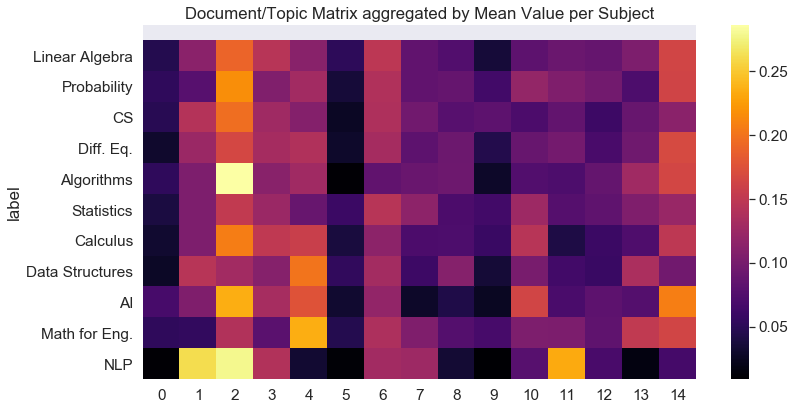

In [335]:
# All subjects and topics
rows = [0,1,2,3,4,5,6,7,8,9,10]
columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[12,6])
plt.title(label='Document/Topic Matrix aggregated by Mean Value per Subject')
# plt.ylabel(ylabel='')
# plt.xlabel(xlabel='')
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
heat_map_02.figure.tight_layout()

plt.savefig('doc_topic.jpg')
plt.show()


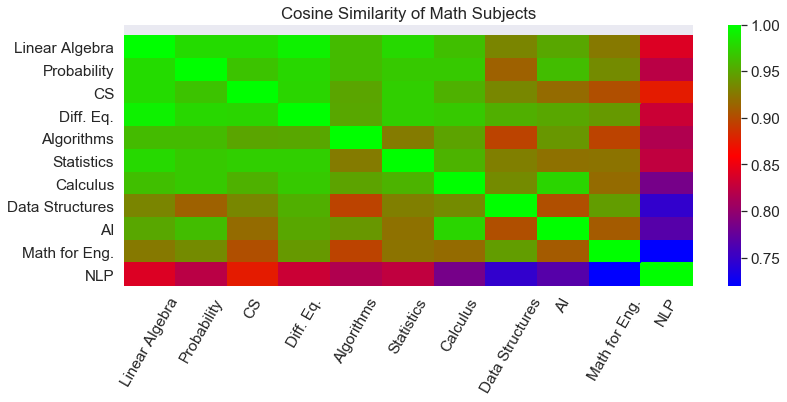

In [315]:
from sklearn.metrics.pairwise import cosine_similarity
plt.figure(figsize=[12,6], frameon=False)
plt.title(label='Cosine Similarity of Math Subjects')
# sns.set(font_scale=1.4)
hm = sns.heatmap(cosine_similarity(sub_df),
           xticklabels = list(subjects.index),
           yticklabels = list(subjects.index), 
            vmin = 0.72,
           cmap='brg')
hm.figure.tight_layout()
plt.xticks(rotation=60) 
plt.ylim(len(sub_df), -0.5)
plt.savefig('cos_sim.png');

In [207]:
display_topics(model_components, feature_names, 10)


Topic  0
lambda, eigenvalue, matrix, eigenvector, transpose, inverse, zero, diagonal, symmetric, orthogonal

Topic  1
probability, event, outcome, conditional, toss, occur, coin, sample, axiom, head

Topic  2
list, log, element, string, hash, code, algorithm, loop, array, sort

Topic  3
integral, theta, delta, curve, dx, area, formula, field, pi, region

Topic  4
vector, transform, dot, plane, length, product, scalar, member, direction, component

Topic  5
laplace_transform, infinity, st, integral, sine, pre, inverse, zero, convolution, dt

Topic  6
equation, solution, differential, derivative, pre, negative, slope, constant, initial, zero

Topic  7
node, tree, address, link, subtree, insert, child, pointer, list, search

Topic  8
edge, vertex, graph, path, algorithm, weight, cycle, short, tree, node

Topic  9
determinant, row, matrix, submatrix, column, cofactor, entry, diagonal, triangular, product

Topic  10
random, variance, variable, expectation, distribution, pdf, probability, c

NMF Topics

Topic  0
lambda, eigenvalue, matrix, eigenvector, transpose, inverse, zero, diagonal, symmetric, orthogonal

Topic  1
probability, event, outcome, conditional, toss, occur, coin, sample, axiom, head

Topic  2
list, log, element, string, hash, code, algorithm, loop, array, sort

Topic  3
integral, theta, delta, curve, dx, area, formula, field, pi, region

Topic  4
vector, transform, dot, plane, length, product, scalar, member, direction, component

Topic  5
laplace_transform, infinity, st, integral, sine, pre, inverse, zero, convolution, dt

Topic  6
equation, solution, differential, derivative, pre, negative, slope, constant, initial, zero

Topic  7
node, tree, address, link, subtree, insert, child, pointer, list, search

Topic  8
edge, vertex, graph, path, algorithm, weight, cycle, short, tree, node

Topic  9
determinant, row, matrix, submatrix, column, cofactor, entry, diagonal, triangular, product

Topic  10
random, variance, variable, expectation, distribution, pdf, probability, cdf, pmf, conditional

Topic  11
particle, temperature, beta, energy, log, alpha, gas, density, volume, heat

Topic  12
state, sub, arrival, markov, probability, chain, renewal, process, random, transition

Topic  13
matrix, column, row, transpose, space, null, pivot, basis, subspace, echelon

Topic  14
model, neural, word, datum, error, network, hypothesis, learning, input, sort

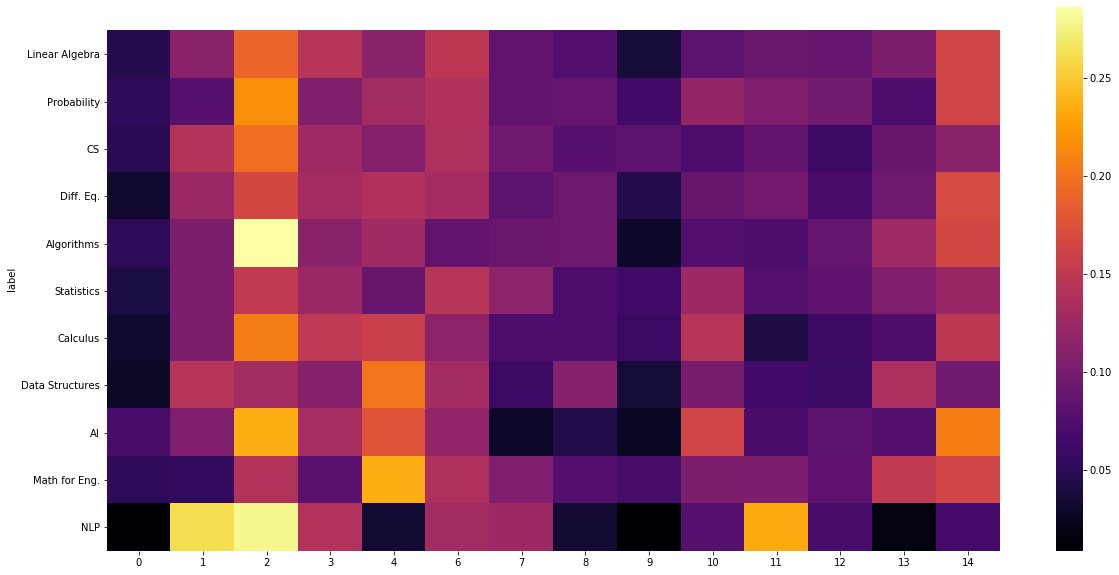

In [208]:
rows = [0,1,2,3,4,5,6,7,8,9,10]
columns = [0,1,2,3,4,6,7,8,9,10,11,12,13,14]# take out topic 5

sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

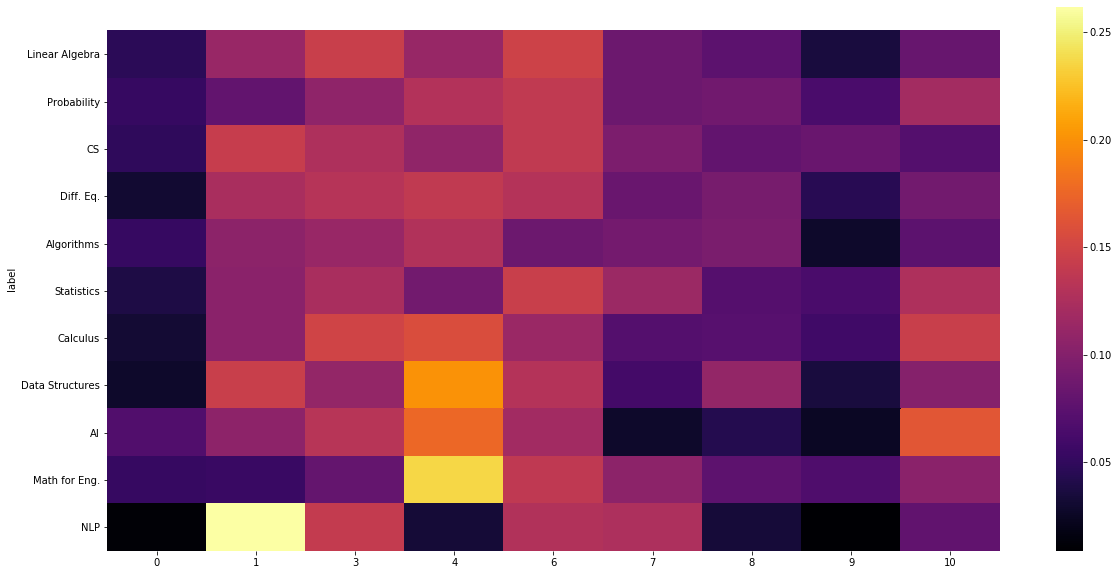

In [167]:
rows = [0,1,2,3,4,5,6,7,8,9,10]
columns = [0,1,3,4,6,7,8,9,10] # take out topic 2
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

# Slices: take out subjects

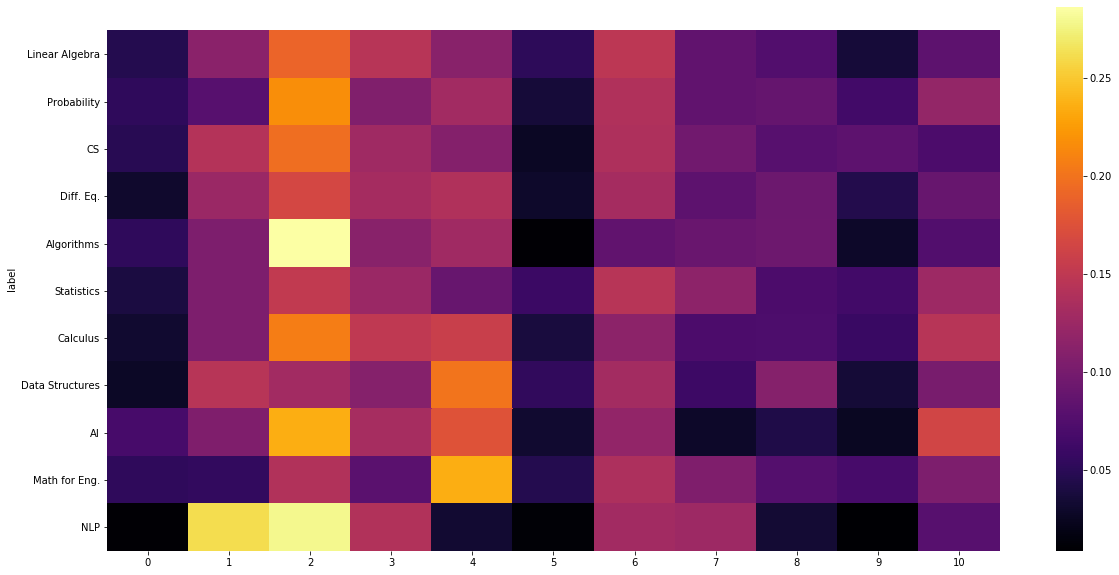

In [168]:
# All subjects and topics
rows = [0,1,2,3,4,5,6,7,8,9,10]
columns = [0,1,2,3,4,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

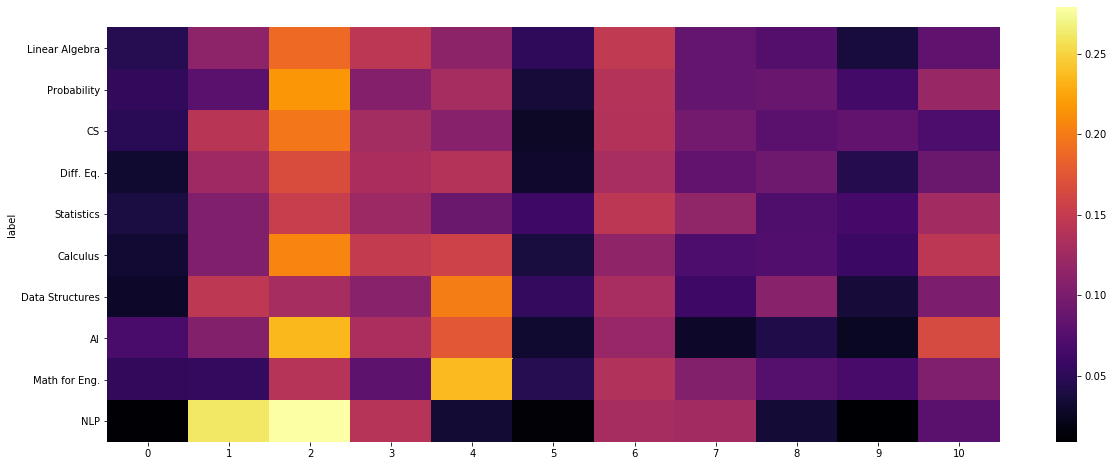

In [169]:
rows = [0,1,2,3,5,6,7,8,9,10] #take out Algorithms (index 4)
columns = [0,1,2,3,4,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax_sub_df = pd.DataFrame(sub_df).max().max()
vmin_sub_df = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin_sub_df, vmax=vmax_sub_df, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

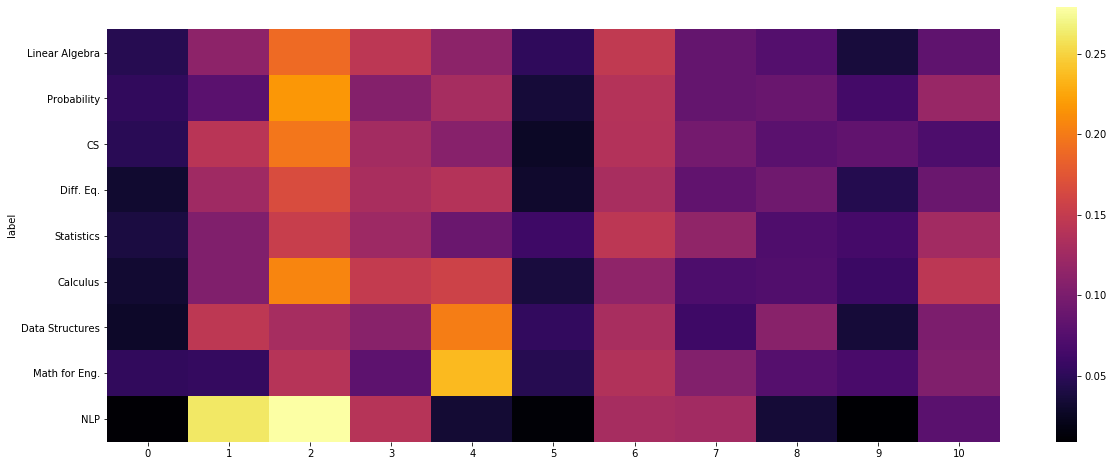

In [170]:
rows = [0,1,2,3,5,6,7,9,10] #take out AI (index 8)
columns = [0,1,2,3,4,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax_sub_df = pd.DataFrame(sub_df).max().max()
vmin_sub_df = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin_sub_df, vmax=vmax_sub_df, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

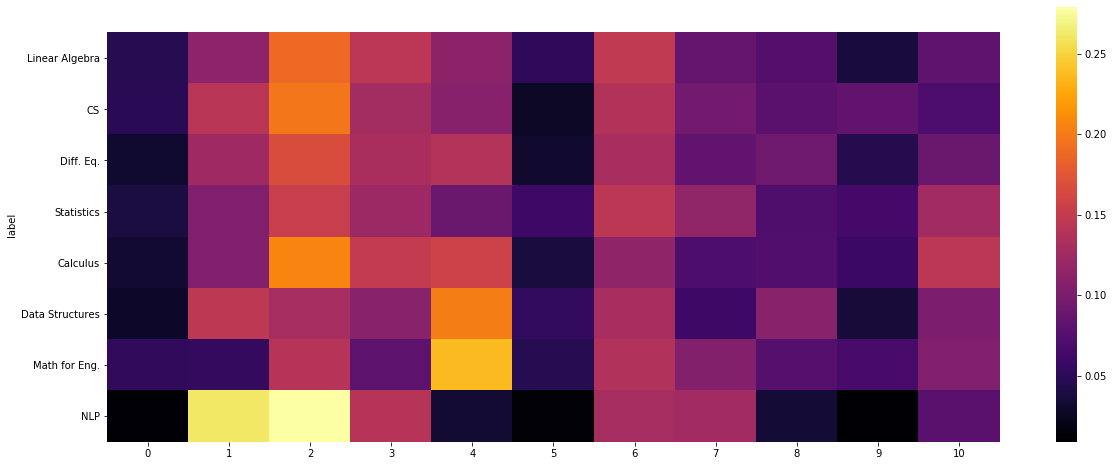

In [171]:
rows = [0,2,3,5,6,7,9,10] #take out Probability (index 1)
columns = [0,1,2,3,4,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax_sub_df = pd.DataFrame(sub_df).max().max()
vmin_sub_df = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin_sub_df, vmax=vmax_sub_df, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

# Slices: Take out the subject/topic combinations that are identical

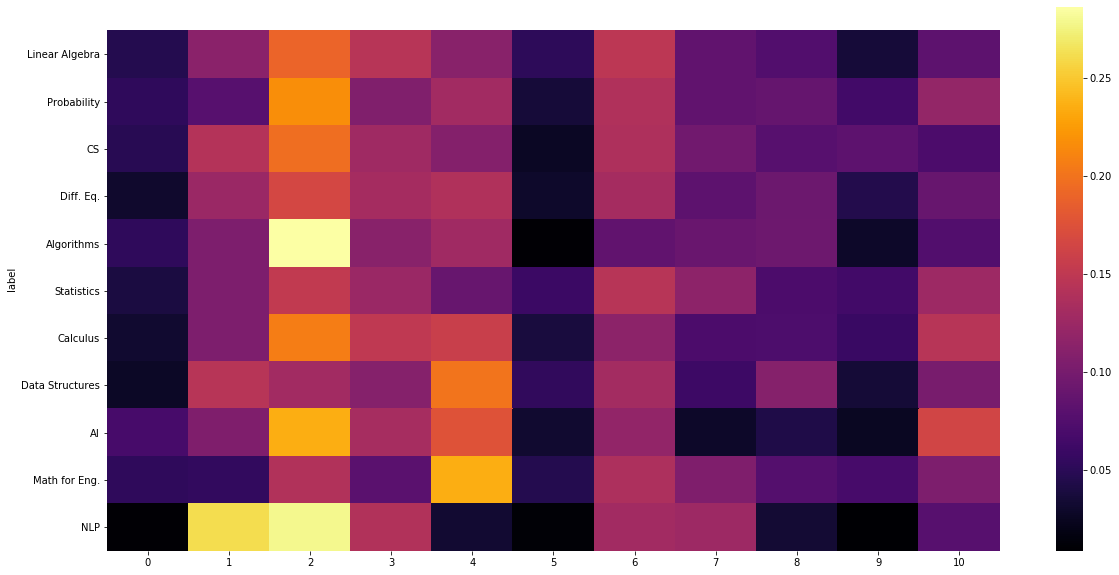

In [197]:
# All subjects and topics
rows = [0,1,2,3,4,5,6,7,8,9,10]
columns = [0,1,2,3,4,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

In [198]:
display_topics(model_components, feature_names, 20)


Topic  0
lambda, eigenvalue, matrix, eigenvector, transpose, inverse, zero, diagonal, symmetric, orthogonal, power, projection, negative, singular, identity, sine, determinant, equation, complex, multigrid

Topic  1
probability, event, outcome, conditional, toss, occur, coin, sample, axiom, head, intersection, independence, union, complement, element, independent, model, disjoint, subset, space

Topic  2
list, log, element, string, hash, code, algorithm, loop, array, sort, search, size, program, item, return, run, python, line, character, type

Topic  3
integral, theta, delta, curve, dx, area, formula, field, pi, region, integrate, surface, plane, dy, zero, cosine, partial, theorem, curl, line

Topic  4
vector, transform, dot, plane, length, product, scalar, member, direction, component, linear, span, line, subspace, combination, multiply, video, rn, matrix, perpendicular

Topic  5
laplace_transform, infinity, st, integral, sine, pre, inverse, zero, convolution, dt, squared, evaluate,

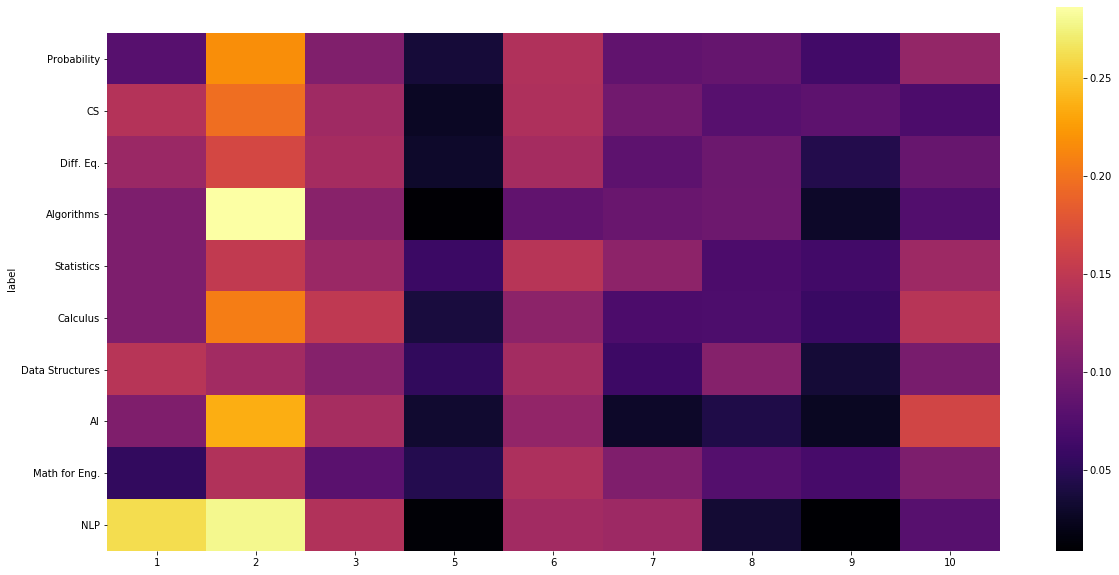

In [202]:
# first remove: Topics 0 and 4 match Linear Algebra
rows = [1,2,3,4,5,6,7,8,9,10]
columns = [1,2,3,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

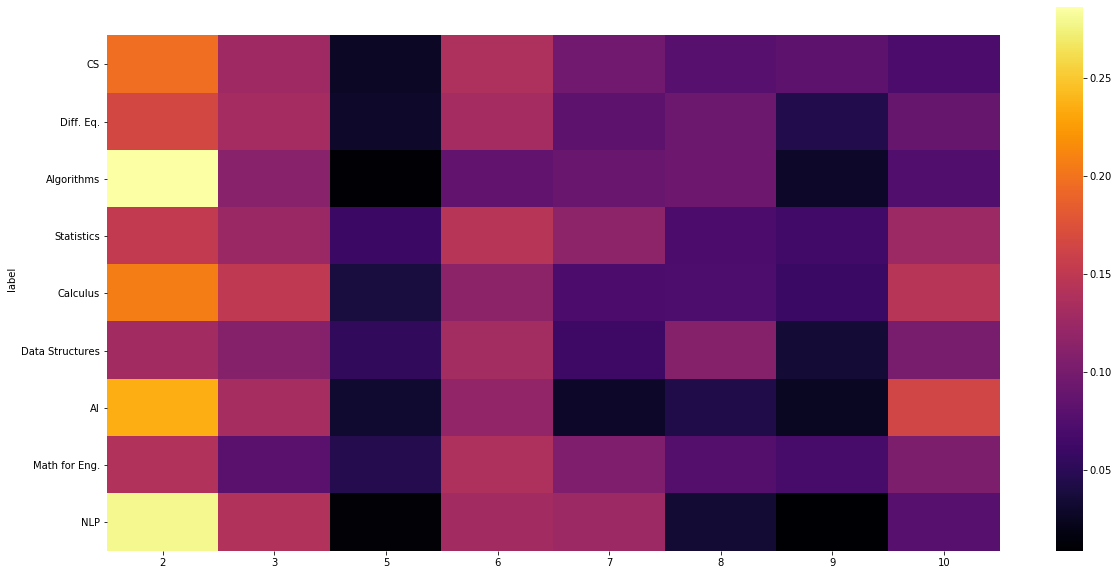

In [203]:
# second remove: Topic 1 matches Probability
rows = [2,3,4,5,6,7,8,9,10]
columns = [2,3,5,6,7,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

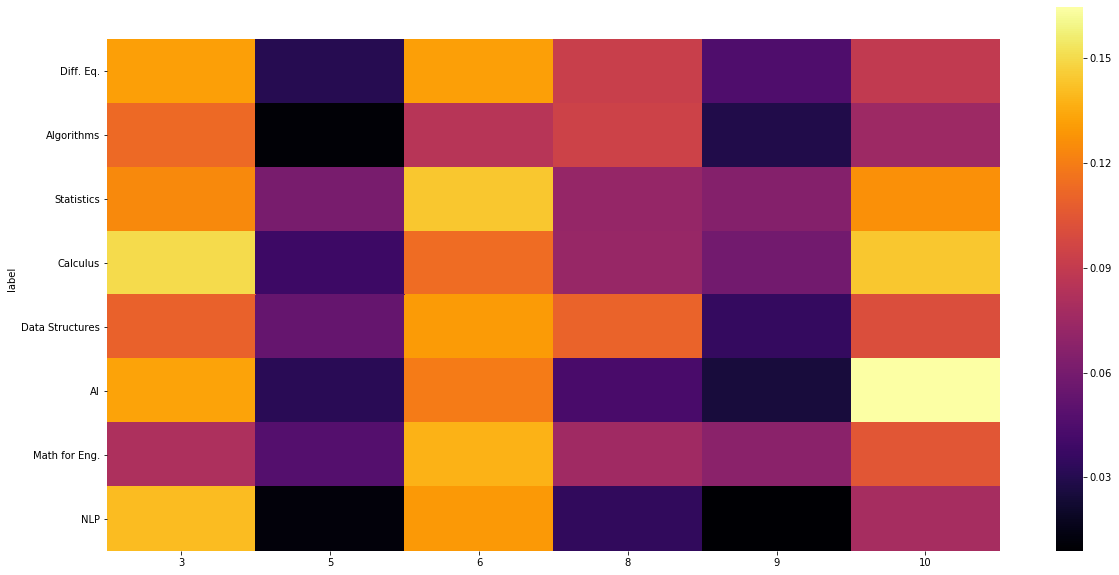

In [205]:
# third remove: Topics 2 and 7 match CS
rows = [3,4,5,6,7,8,9,10]
columns = [3,5,6,8,9,10]
sub_df = topic_mean_by_subject_freq.iloc[rows,columns]
vmax = pd.DataFrame(sub_df).max().max()
vmin = pd.DataFrame(sub_df).min().min()
plt.figure(figsize=[20,10])
heat_map_02 = sns.heatmap(sub_df, vmin=vmin, vmax=vmax, 
                              cmap='inferno', xticklabels=True, yticklabels=True)
plt.ylim(len(sub_df), -0.5)
plt.show()

# Other Heatmaps (leftover)

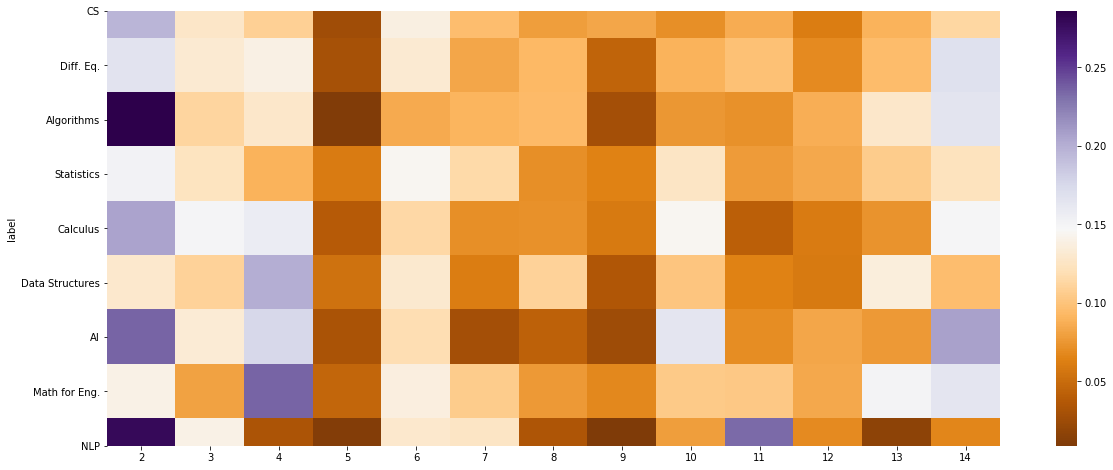

In [172]:
vmax_2 = pd.DataFrame(topic_mean_by_subject_freq.iloc[2:,2:]).max().max()
vmin_2 = pd.DataFrame(topic_mean_by_subject_freq.iloc[2:,2:]).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq.iloc[2:,2:], vmin=vmin_2, vmax=vmax_2, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

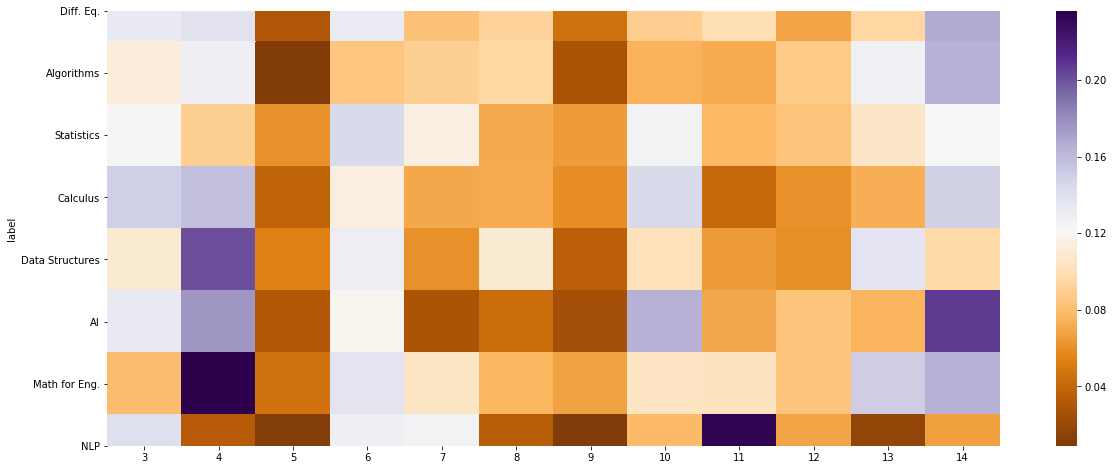

In [173]:
vmax_3 = pd.DataFrame(topic_mean_by_subject_freq.iloc[3:,3:]).max().max()
vmin_3 = pd.DataFrame(topic_mean_by_subject_freq.iloc[3:,3:]).min().min()
plt.figure(figsize=[20,8])
heat_map_02 = sns.heatmap(topic_mean_by_subject_freq.iloc[3:,3:], vmin=vmin_3, vmax=vmax_3, 
                              cmap='PuOr', xticklabels=True, yticklabels=True)
plt.show()

In [ ]:
display_topics(model_components, feature_names, 10)

In [ ]:
list(subjects.index)

In [ ]:
df[df['label']=='Linear Algebra']

In [ ]:
print(list(subjects.index))

In [175]:
linalg_rd = pd.DataFrame(rd_v).iloc[df_linalg.index]
prob_rd = pd.DataFrame(rd_v).iloc[df_prob.index]
cs_rd = pd.DataFrame(rd_v).iloc[df_cs.index]
diffeq_rd = pd.DataFrame(rd_v).iloc[df_diffeq.index]
algo_rd = pd.DataFrame(rd_v).iloc[df_algo.index]
stats_rd = pd.DataFrame(rd_v).iloc[df_stats.index]
calc_rd = pd.DataFrame(rd_v).iloc[df_calc.index]
datastruc_rd = pd.DataFrame(rd_v).iloc[df_datastruc.index]
ai_rd = pd.DataFrame(rd_v).iloc[df_ai.index]
engmath_rd = pd.DataFrame(rd_v).iloc[df_engmath.index]
nlp_rd = pd.DataFrame(rd_v).iloc[df_nlp.index]


In [176]:
rd_list = [linalg_rd, prob_rd, cs_rd, diffeq_rd, algo_rd, stats_rd, calc_rd, datastruc_rd, ai_rd, engmath_rd, nlp_rd]
rd_names = ["linalg_rd", "prob_rd", "cs_rd", "diffeq_rd", "algo_rd", "stats_rd", "calc_rd", "datastruc_rd", "ai_rd", "engmath_rd", "nlp_rd"]
rd_dict = {key:val for (key, val) in zip(rd_names, rd_list)}

I have created slices of the original dataframe based on their subject labels.  
Now I need to get their indices, and create a heatmap from each list of indices.

# Heat maps for each subject

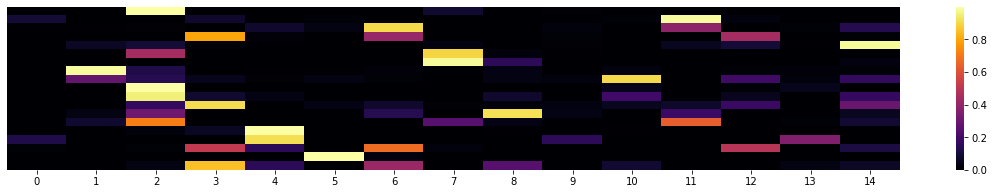

In [177]:
plt.figure(figsize=[20,3])
heat_map_linalg = sns.heatmap(linalg_rd.sample(19), 
                              cmap='inferno', xticklabels=True, yticklabels=False)
plt.show();

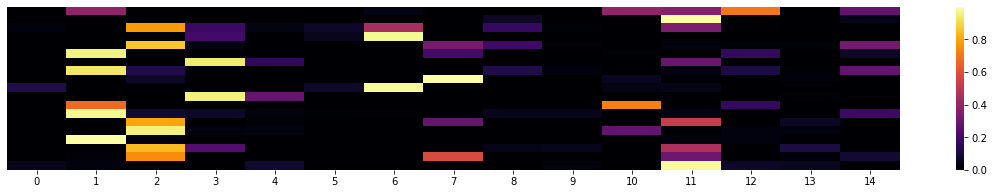

In [178]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

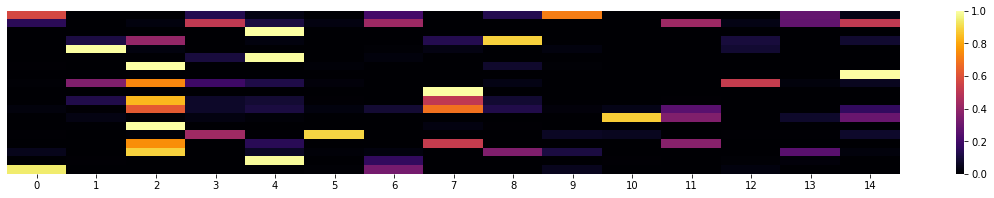

In [179]:
plt.figure(figsize=[20,3])
heat_map_prob = sns.heatmap(prob_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

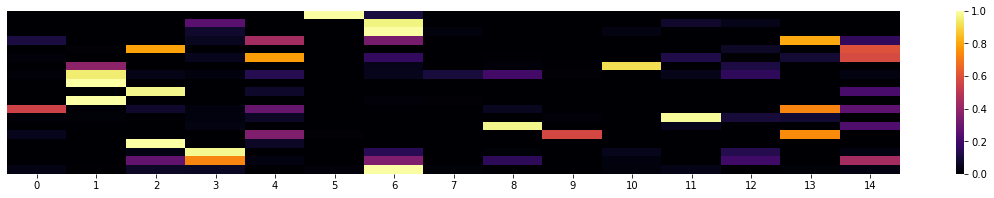

In [180]:
plt.figure(figsize=[20,3])
heat_map_cs = sns.heatmap(cs_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

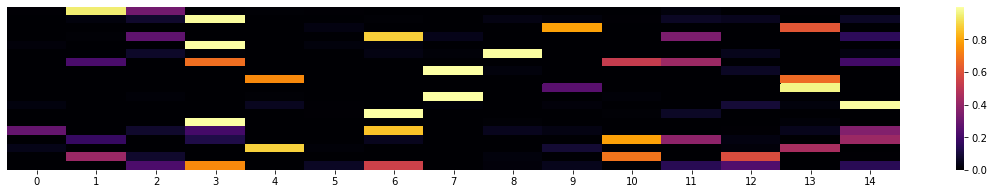

In [181]:
plt.figure(figsize=[20,3])
heat_map_diffeq = sns.heatmap(diffeq_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

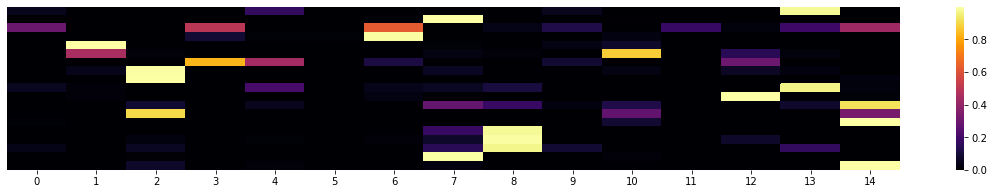

In [182]:
plt.figure(figsize=[20,3])
heat_map_algo = sns.heatmap(algo_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

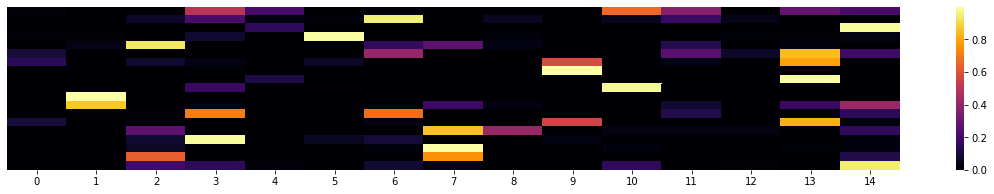

In [189]:
plt.figure(figsize=[20,3])
heat_map_stats = sns.heatmap(stats_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

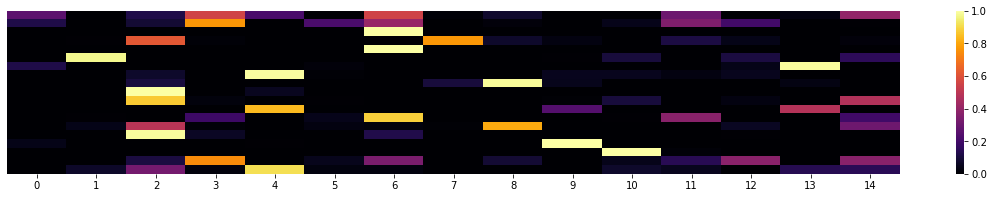

In [190]:
plt.figure(figsize=[20,3])
heat_map_calc = sns.heatmap(calc_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

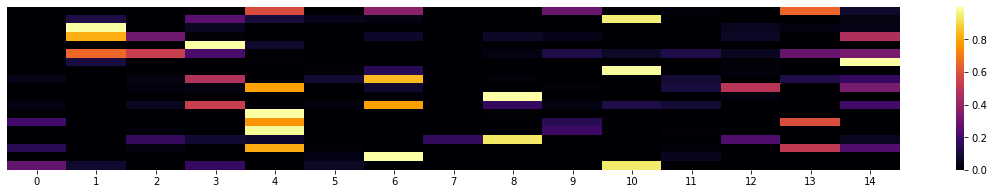

In [191]:
plt.figure(figsize=[20,3])
heat_map_datastruc = sns.heatmap(datastruc_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

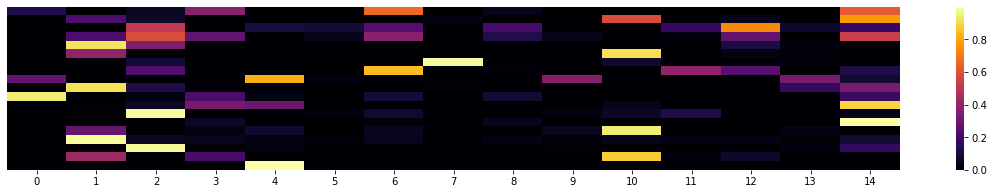

In [192]:
plt.figure(figsize=[20,3])
heat_map_ai = sns.heatmap(ai_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

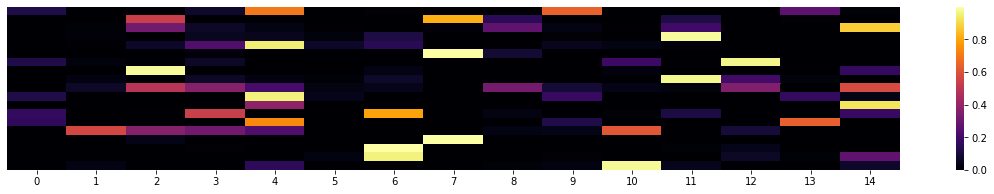

In [193]:
plt.figure(figsize=[20,3])
heat_map_engmath = sns.heatmap(engmath_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

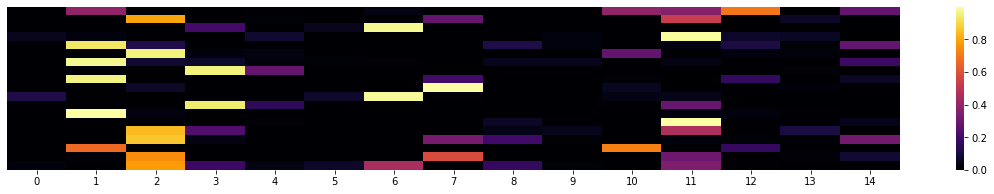

In [194]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), cmap='inferno', xticklabels=True, yticklabels=False)
plt.show()

In [195]:
nlp_rd.shape

(19, 15)

# Entropy

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0).
from scipy.stats import entropy
entropy(linalg_rd)

In [ ]:
entropy(prob_rd)[0]

In [ ]:
entropy_list = [entropy(x)[0].round(2) for x in rd_list]
# entropy_dict = {key:val for (key, val) in zip(rd_names, entropy(rd_list)[0])}
entropy_list

In [ ]:
for subj, ent in zip(list(subjects.index), entropy_list):
    print(f"Kullback-Leibler divergence of {subj}:", ent)

Divergence range for 60 topics: 2.89-4.93  
Divergence range for 50 topics: 2.91-4.93  
Divergence range for 40 topics: 2.91-4.94  
Divergence range for 30 topics: 2.91-4.95  
Divergence range for 20 topics: 2.91-4.96  
Divergence range for 10 topics: 2.90-4.96  
Divergence range for 5 topics: 2.90-4.98